<a href="https://colab.research.google.com/github/haideraheem/Machine-Learning-/blob/main/cnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer

#drive.mount('/content/drive')# mounting data from drive to colab
#Loading data into dataframes
!cp /content/drive/MyDrive/archive.zip .
!unzip archive.zip

Archive:  archive.zip
replace Sign Language for Alphabets/a/a_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

## Loading images and labels
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/Sign Language for Alphabets', labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=64, image_size=(100,
    100), shuffle=True, seed=22, validation_split=0.15, subset='training',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)

test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Sign Language for Alphabets', labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=1, image_size=(100,
    100), shuffle=True, seed=22, validation_split=0.15, subset='validation',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
y = np.concatenate([y for x, y in train_dataset], axis=0)

Found 40500 files belonging to 27 classes.
Using 34425 files for training.
Found 40500 files belonging to 27 classes.
Using 6075 files for validation.


In [ ]:
"""

#train_datase = pd.read_csv("/content/drive/MyDrive/MLProjectDataset/SignData/sign_mnist_train.csv")
#test_data = pd.read_csv("/content/drive/MyDrive/MLProjectDataset/SignData/sign_mnist_test.csv")
#testing_data_label = pd.read_csv("/content/drive/MyDrive/MLProjectDataset/SignData/sign_mnist_test.csv")

# Seperating label for the test data
y = testing_data_label['label']


#plt.figure(figsize = (10,10)) # Label Count
#sns.set_style("darkgrid")
#sns.countplot(train_df['label'])
#y_train = train_df['label']
#y_test = test_df['label']
#del train_df['label']
#del test_df['label']

#Doing Data Visualisation, by plotting data against the label
#plt.figure(figsize = (15,15))
#sns.countplot(train_df['label'])


# Removing the labels from the dataframes
#y_train = training_dataframe['label']
#y_test = testing_dataframe['label']
#del training_dataframe['label']
#del testing_dataframe['label']

#Binarizing the label, conversion to binary, forming 26x26 Matrix
binary_label = LabelBinarizer()
y_train = binary_label.fit_transform(y_train)
y_test = binary_label.fit_transform(y_test)

#Getting both x and y values
x_train = training_dataframe.values
x_test = testing_dataframe.values

#Conversion to GrayScale
#Normalizing the data, squeezing it, dividing by 255 so CNN converges better
x_train = x_train / 255
x_test = x_test / 255

# Reshaping data as required by CNN  for Input in 3D
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

datagen = ImageDataGenerator(
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
)
datagen.fit(x_train)




learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(2 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()
history = model.fit(train_dataset ,epochs = 20 , validation_data = test_data , callbacks = [learning_rate_reduction]) 
model.save_weights('cnn_model.h5')
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
"""



In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(2 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(12 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 27 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()
history = model.fit(train_dataset ,epochs = 5 , validation_data = test_data , callbacks = [learning_rate_reduction]) 
model.save_weights('cnn_model.h5')
#print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 2)       56        
                                                                 
 batch_normalization_3 (Batc  (None, 100, 100, 2)      8         
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 2)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 25)        475       
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 25)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 50, 50, 25)      

In [ ]:
y_hat = []
y = []
for element in test_data.as_numpy_iterator(): 
  prediction = model.predict(element[0]).flatten()
  result = np.where(prediction == np.amax(prediction))
  y_hat.append(result[0][0])
  y.append(element[1][0])

orig = []
for y_1 in y:
  orig.append(y_1.argmax())

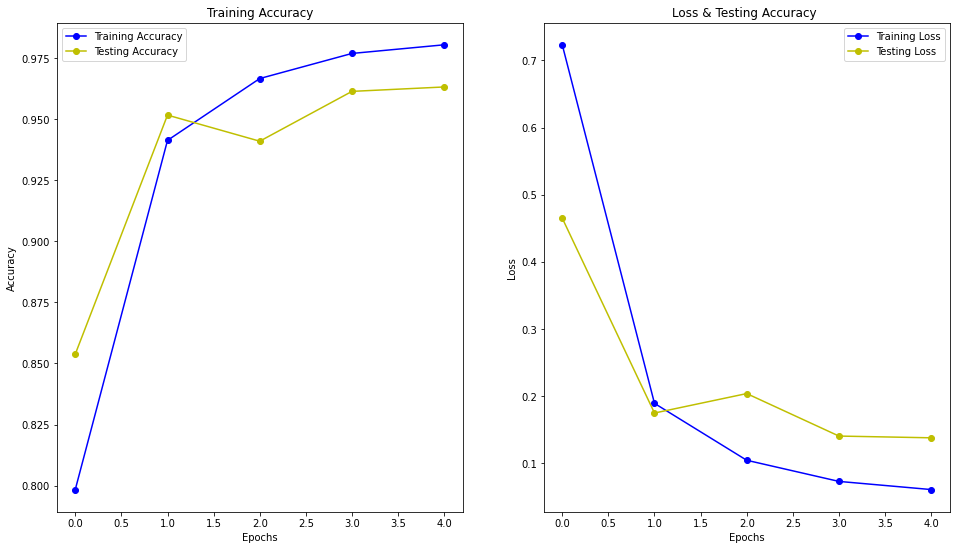

In [ ]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Testing Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Testing Loss')
ax[1].set_title('Loss & Testing Accuracy ')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(orig, y_hat)

0.9632921810699588

In [ ]:
from sklearn.metrics import classification_report
target_names = train_dataset.class_names

print(classification_report(orig, y_hat, target_names=target_names, digits=2))

              precision    recall  f1-score   support

           a       0.93      0.89      0.91       209
           b       0.96      0.89      0.92       246
           c       0.97      0.98      0.97       206
           d       0.96      0.95      0.96       197
           e       1.00      1.00      1.00       224
           f       0.94      0.98      0.96       232
           g       0.95      0.98      0.96       246
           h       0.97      1.00      0.98       208
           i       0.90      0.93      0.92       204
           j       0.98      0.97      0.98       239
           k       0.95      0.94      0.95       214
           l       0.93      0.95      0.94       235
           m       0.98      1.00      0.99       253
           n       1.00      0.99      0.99       227
           o       0.96      0.93      0.95       213
           p       1.00      1.00      1.00       219
           q       1.00      1.00      1.00       257
           r       0.95    

In [ ]:
cm = tf.math.confusion_matrix(labels=orig, predictions=y_hat)

Text(69.0, 0.5, 'Truth')

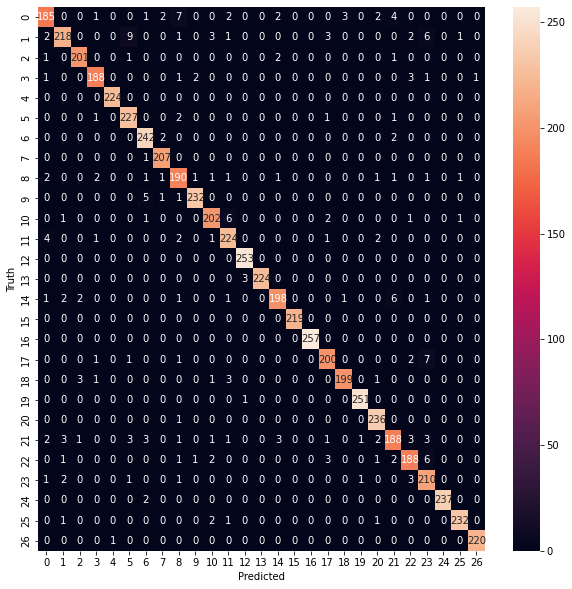

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.save_weights('cnn_model.h5')

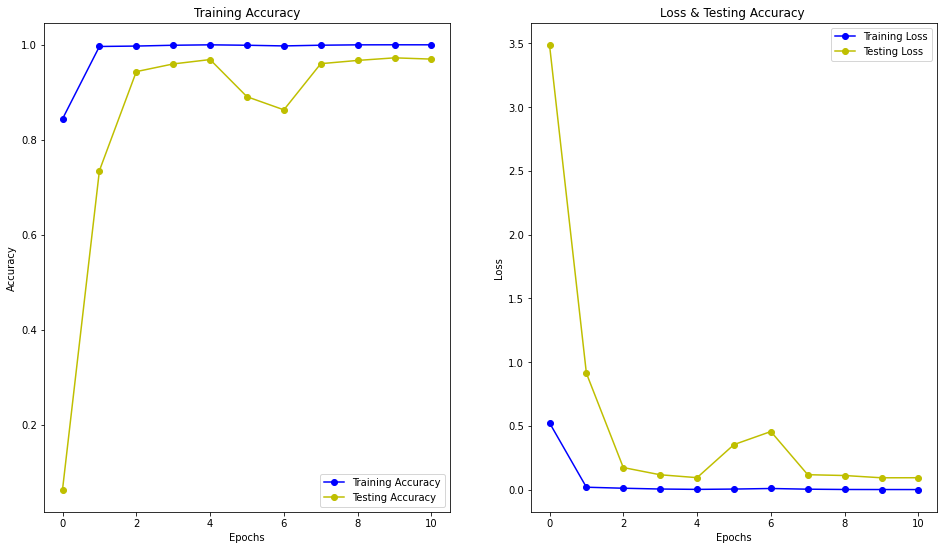

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Testing Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Testing Loss')
ax[1].set_title('Loss & Testing Accuracy ')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()